In [28]:
# Import Libraries
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import numpy as np
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import dask
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
%matplotlib inline
from dask.base import compute

In [10]:
riders = pd.read_csv('data/ride data/201801-citibike-tripdata.csv', parse_dates=['starttime','stoptime'])

In [3]:
riders.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1


In [11]:
riders.starttime.astype('M8[us]')
riders.stoptime.astype('M8[us]')

0        2018-01-01 14:07:08.186
1        2018-01-01 15:45:33.341
2        2018-01-01 15:47:35.172
3        2018-01-01 15:45:20.191
4        2018-01-01 18:19:57.642
                   ...          
718989   2018-01-31 17:42:30.589
718990   2018-01-31 17:38:24.720
718991   2018-01-31 18:25:58.335
718992   2018-01-31 18:51:24.683
718993   2018-01-31 19:47:48.640
Name: stoptime, Length: 718994, dtype: datetime64[ns]

In [12]:
riders.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1


In [14]:
riders['year'] = riders.starttime.dt.year

riders['start_date'] = riders.starttime.dt.date
riders['stop_date'] = riders.stoptime.dt.date

riders['start_hour'] = riders.starttime.dt.hour
riders['stop_hour'] = riders.stoptime.dt.hour

riders['start_min'] = riders.starttime.dt.minute
riders['stop_min'] = riders.stoptime.dt.minute


In [15]:
riders['season'] = riders.starttime.dt.month.apply(lambda x: 'winter' if x <= 2 else 'spring'\
                                                  if x <= 5 else 'summer' if x <= 8 else 'fall'\
                                                  if x <= 11 else 'winter')

In [19]:
riders['dayofweek'] = riders['starttime'].dt.weekday.apply(lambda x: 'Monday' if x ==0 else 'Tuesday'\
                                                           if x == 1 else 'Wednesday' if x == 2 else 'Thursday'\
                                                           if x == 3 else 'Friday' if x == 4 else 'Saturday'\
                                                           if x == 5 else 'Sunday')

In [21]:
riders['start_interval'] = riders.apply(lambda x: str(x['start_hour']) + ":" + str(x['start_min']), axis = 1)

In [22]:
riders['stop_interval'] = riders.apply(lambda x: str(x['stop_hour']) + ":" + str(x['stop_min']), axis = 1)

In [40]:
riders.groupby(['start station id', 'start_date', 'season', 'dayofweek', 'start_hour'])\
[['starttime']].count().reset_index()

,start station id,start_date,season,dayofweek,start_hour,starttime
0,72,2018-01-01,winter,Monday,13,1
1,72,2018-01-01,winter,Monday,15,3
2,72,2018-01-01,winter,Monday,18,1
3,72,2018-01-01,winter,Monday,21,1
4,72,2018-01-02,winter,Tuesday,7,1
...,...,...,...,...,...,...
227484,3664,2018-01-31,winter,Wednesday,15,7
227485,3664,2018-01-31,winter,Wednesday,16,9
227486,3664,2018-01-31,winter,Wednesday,17,16
227487,3664,2018-01-31,winter,Wednesday,18,2


In [37]:
outgoing_rides = riders.groupby(['start station id', 'start_date', 'season', 'dayofweek', 'start_hour'])\
[['starttime']].count().reset_index().rename(columns={'starttime':'outgoing_bike_count'})

In [42]:
outgoing_rides.head(30)

,start station id,start_date,season,dayofweek,start_hour,outgoing_bike_count
0,72,2018-01-01,winter,Monday,13,1
1,72,2018-01-01,winter,Monday,15,3
2,72,2018-01-01,winter,Monday,18,1
3,72,2018-01-01,winter,Monday,21,1
4,72,2018-01-02,winter,Tuesday,7,1
5,72,2018-01-02,winter,Tuesday,8,3
6,72,2018-01-02,winter,Tuesday,9,1
7,72,2018-01-02,winter,Tuesday,10,1
8,72,2018-01-02,winter,Tuesday,11,1
9,72,2018-01-02,winter,Tuesday,12,1


In [43]:
incoming_rides = riders.groupby(['end station id', 'stop_date', 'season', 'dayofweek', 'stop_hour'])\
[['stoptime']].count().reset_index().rename(columns={'stoptime':'incoming_bike_count'})

In [44]:
incoming_rides

,end station id,stop_date,season,dayofweek,stop_hour,incoming_bike_count
0,72,2018-01-01,winter,Monday,11,2
1,72,2018-01-01,winter,Monday,12,1
2,72,2018-01-01,winter,Monday,13,1
3,72,2018-01-01,winter,Monday,16,1
4,72,2018-01-01,winter,Monday,17,1
...,...,...,...,...,...,...
227794,3664,2018-01-31,winter,Wednesday,15,1
227795,3664,2018-01-31,winter,Wednesday,16,1
227796,3664,2018-01-31,winter,Wednesday,17,3
227797,3664,2018-01-31,winter,Wednesday,18,2


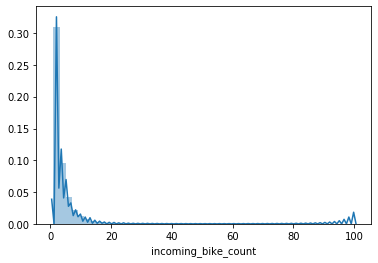

In [45]:
sns.distplot(incoming_rides['incoming_bike_count'])

In [ ]:
incoming_rides['dock_demand'] = incoming_rides.swifter.apply(lambda x: 'High' if x['incoming_bike_count'] > __\
                                                            else 'Medium' if x['incoming_bike_count'] > __\
                                                            else 'low', axis )